In [17]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud
import altair as alt
import plotly.express as px
from dash import Dash, dcc, html
import dash_bootstrap_components as dbc

In [18]:
url = "https://raw.githubusercontent.com/UIUC-iSchool-DataViz/is445_data/main/bfro_reports_fall2022.csv"
data = pd.read_csv(url)

In [19]:
data.head()

,observed,location_details,county,state,season,title,latitude,longitude,date,number,...,precip_intensity,precip_probability,precip_type,pressure,summary,uv_index,visibility,wind_bearing,wind_speed,location
0,Ed L. was salmon fishing with a companion in P...,East side of Prince William Sound,Valdez-Chitina-Whittier County,Alaska,Fall,NaN,NaN,NaN,NaN,1261.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,heh i kinda feel a little dumb that im reporti...,"the road is off us rt 80, i dont know the exit...",Warren County,New Jersey,Fall,NaN,NaN,NaN,NaN,438.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,I was on my way to Claremont from Lebanon on R...,Close to Claremont down 120 not far from Kings...,Sullivan County,New Hampshire,Summer,Report 55269: Dawn sighting at Stevens Brook o...,43.41549,-72.33093,2016-06-07,55269.0,...,0.001,0.7,rain,998.87,Mostly cloudy throughout the day.,6.0,9.70,262.0,0.49,POINT(-72.33093000000001 43.415490000000005)
3,I was northeast of Macy Nebraska along the Mis...,Latitude & Longitude : 42.158230 -96.344197,Thurston County,Nebraska,Spring,Report 59757: Possible daylight sighting of a ...,42.15685,-96.34203,2018-05-25,59757.0,...,0.000,0.0,NaN,1008.07,Partly cloudy in the morning.,10.0,8.25,193.0,3.33,POINT(-96.34203000000001 42.15685)
4,"While this incident occurred a long time ago, ...","Ward County, Just outside of a the Minuteman T...",Ward County,North Dakota,Spring,Report 751: Hunter describes described being s...,48.25422,-101.31660,2000-04-21,751.0,...,NaN,NaN,rain,1011.47,Partly cloudy until evening.,6.0,10.00,237.0,11.14,POINT(-101.3166 48.254220000000004)


In [20]:
data['date'] = pd.to_datetime(data['date'], errors='coerce')

data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month
data['season'] = data['season'].fillna("Unknown")

data = data.dropna(subset=['latitude', 'longitude'])

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/divyajain/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


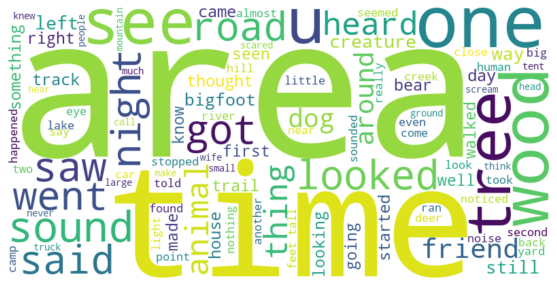

alt.Chart(...)

In [21]:
import pandas as pd
import altair as alt
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

url = "https://raw.githubusercontent.com/UIUC-iSchool-DataViz/is445_data/main/bfro_reports_fall2022.csv"
data = pd.read_csv(url)

descriptions = data['observed'].dropna().str.lower().str.replace('[^a-z\s]', '', regex=True)

cleaned_descriptions = descriptions.apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

all_text = ' '.join(cleaned_descriptions)

wordcloud = WordCloud(width=800, height=400, max_words=100, background_color="white").generate(all_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

word_freq = pd.Series(' '.join(cleaned_descriptions).split()).value_counts().reset_index()
word_freq.columns = ['word', 'frequency']

word_freq = word_freq.head(100)

word_chart = alt.Chart(word_freq).mark_bar().encode(
    x=alt.X('frequency:Q', sort='-y'),
    y=alt.Y('word:N', sort='-x'),
    color='frequency:Q',
    tooltip=['word:N', 'frequency:Q']  # Tooltip for interactivity
).properties(
    title='Most Frequent Words in Report Descriptions'
)

word_chart.show()

In [22]:
word_chart.save("wordchart.json")

In [13]:
sightings_by_state = data.groupby('state').size().reset_index(name='sightings_count')

# Create a selection for zooming (interval selection)
zoom = alt.selection_interval()

# Create the bar chart
chart2 = alt.Chart(sightings_by_state).mark_bar().encode(
    x=alt.X('state:N', title='State'),
    y=alt.Y('sightings_count:Q', title='Number of Sightings'),
    color='state:N',  # Color by state
    tooltip=['state:N', 'sightings_count:Q']  # Tooltip to show details
).add_selection(
    zoom
).properties(
    width=800,
    height=400,
    title="Bigfoot Sightings by State"  # Add title here
).interactive()  

# Display the chart
chart2

/var/folders/s5/wltcb2kn14q_f2mvntm4xf500000gn/T/ipykernel_42908/5693602.py:7: AltairDeprecationWarning: Deprecated in `altair=5.0.0`. Use add_params instead.
  chart2 = alt.Chart(sightings_by_state).mark_bar().encode(


alt.Chart(...)

In [23]:
chart2.save("BigfootSightingsbyState.json")